In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os


In [8]:
file = open("Pride and Prejudice.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)
 
# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 
 
#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space
 
#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
 
# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))
 
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]
vocab_size = len(tokenizer.word_index) + 1
sequences = []
 
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
     
sequences = np.array(sequences)
sequences[:10]
X = []
y = []
 
for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
     
X = np.array(X)
y = np.array(y)
y = to_categorical(y, num_classes=vocab_size)

In [10]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

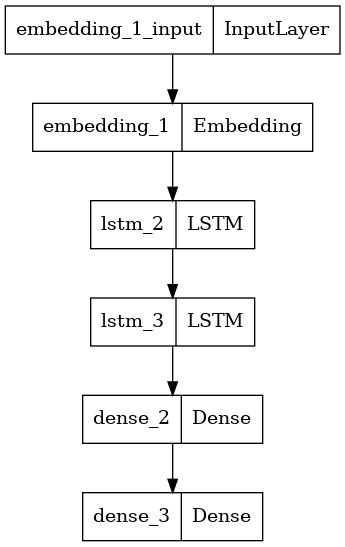

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='plot.png', show_layer_names=True)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
 
checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
 
# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))
 
def Predict_Next_Words(model, tokenizer, text):
 
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
   
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
   
  print(predicted_word)
  return predicted_word
  
while(True):
  text = input("Enter your line: ")
   
  if text == "0":
      print("Execution completed.....")
      break
   
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
         
          Predict_Next_Words(model, tokenizer, text)
           
      except Exception as e:
        print("Error occurred: ",e)
        continue

In [ ]:
# Assume history is the result of model.fit()
history = model.fit(X, y, epochs=100, verbose=1)

# Plotting loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training loss')
plt.title('Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()